In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
df_player_of_the_week = pd.read_csv("../input/NBA_player_of_the_week.csv")

# Any results you write to the current directory are saved as output.

In [3]:
# get first player of the week appearance of each player
df_player_of_the_week['Date'] = pd.to_datetime(df_player_of_the_week.Date)
first_win = df_player_of_the_week.groupby('Player')['Date'].agg(['first'])
first_win.reset_index(level=0,inplace=True)
# show dataframe content and num of rows
first_win.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 2 columns):
Player    282 non-null object
first     282 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 4.5+ KB


In [4]:
# Attach details for each player
first_win_full_df = pd.merge(first_win, df_player_of_the_week, how='inner', left_on=['Player','first'], right_on=['Player','Date'])

first_win_full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282 entries, 0 to 281
Data columns (total 15 columns):
Player               282 non-null object
first                282 non-null datetime64[ns]
Active season        282 non-null int64
Team                 282 non-null object
Conference           153 non-null object
Date                 282 non-null datetime64[ns]
Position             282 non-null object
Height               282 non-null object
Weight               282 non-null int64
Age                  282 non-null int64
Draft Year           282 non-null int64
Seasons in league    282 non-null int64
Season               282 non-null object
Season short         282 non-null int64
Real_value           282 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(6), object(6)
memory usage: 35.2+ KB


#### Q. At which career stage players win the title for the first time

Text(0.5, 1.0, 'First award winning - by season in league')

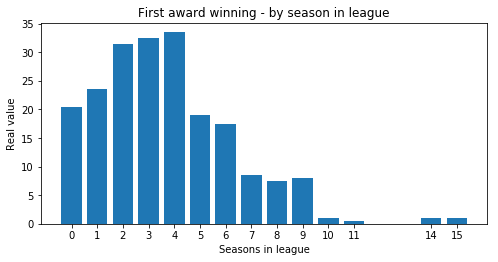

In [5]:
df_first_time_by_seasons_in_leg = first_win_full_df.groupby(['Seasons in league'])['Real_value'].sum().reset_index()
plt.figure(figsize=(8,3.7))
plt.bar(pd.to_numeric(df_first_time_by_seasons_in_leg['Seasons in league']),df_first_time_by_seasons_in_leg['Real_value'])
plt.xticks(pd.to_numeric(df_first_time_by_seasons_in_leg['Seasons in league']))
plt.xlabel('Seasons in league')
plt.ylabel('Real value')
plt.title('First award winning - by season in league')

##### A. Most of the players winning the title after 2-4 full season.
##### Interesthing view is that several players that won for the first time after 14-15 yeqars in league, let's check them out

In [6]:
# checking out who won after that period of the time for the first time.
first_win_full_df[['Player','Seasons in league','Season short']].sort_values(by=['Seasons in league'],ascending=False).head(4)

,Player,Seasons in league,Season short
143,Kareem Abdul-Jabbar,15,1985
141,Julius Erving,14,1987
194,Mike Conley,11,2019
2,Al Harrington,10,2009


##### we can say that Kareem  and Dr. J won the title at late stage of their career mainly because the title started at 84-85.
